# Non-Parametric Statistics 

## Central Limit Theorem

In [28]:
% Create an Exponential Distribution representing the amount of time 
% passengers had to wait for their train with an average wait of 6 min.
waitTimes_pop = exprnd(6,100000,1);

% visualize distribution of wait times... make sure it looks uniform


% What was the average wait time of the population
avgWaitTime_pop = mean(waitTimes_pop);


% repeatedly sample the mean wait time of some sample of passengers
track = 1;

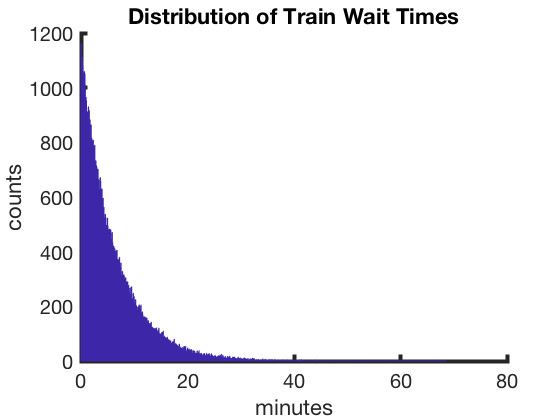

In [29]:
%plot inline
hist(waitTimes_pop,1000)
set(gcf,'Color','w')
set(gca,'Box','off')
set(gca,'LineWidth',3)
set(gca,'FontSize',15)
title('Distribution of Train Wait Times')
xlabel('minutes')
ylabel('counts')

### Recompute mean across increasing Sample sizes

The Central Limit Theorem States that as the sample size increases, the distribution of the sample mean approaches a normal distribution

In [34]:
clear randPassenger_avgWait
for s = 1:200 % increase sample size
    parfor i = 1:10000 % number of times to resample population and compute mean
        rng(i)
        randPassengerIdx = randperm(length(waitTimes_pop),s);
        randPassenger_avgWait(s,i) = mean(waitTimes_pop(randPassengerIdx));
    end
end



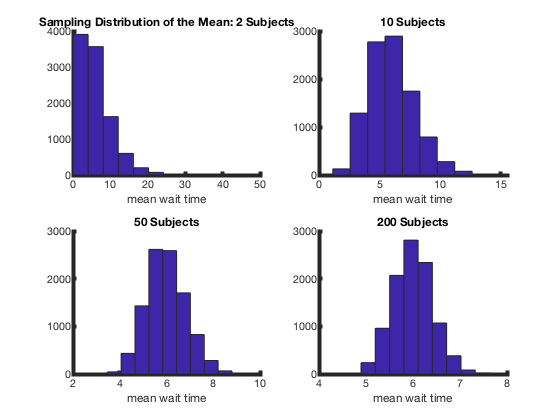

In [37]:
%plot inline
subplot(2,2,1) 
hist(randPassenger_avgWait(2,:))
set(gcf,'Color','w')
set(gca,'Box','off')
set(gca,'LineWidth',3)
set(gca,'FontSize',8)
title('Sampling Distribution of the Mean: 2 Subjects')
xlabel('mean wait time')
subplot(2,2,2) 
hist(randPassenger_avgWait(10,:))
set(gcf,'Color','w')
set(gca,'Box','off')
set(gca,'LineWidth',3)
set(gca,'FontSize',8)
title('10 Subjects')
xlabel('mean wait time')
subplot(2,2,3) 
hist(randPassenger_avgWait(50,:))
set(gcf,'Color','w')
set(gca,'Box','off')
set(gca,'LineWidth',3)
set(gca,'FontSize',8)
title('50 Subjects')
xlabel('mean wait time')
subplot(2,2,4) 
hist(randPassenger_avgWait(200,:))
set(gcf,'Color','w')
set(gca,'Box','off')
set(gca,'LineWidth',3)
set(gca,'FontSize',8)
title('200 Subjects')
xlabel('mean wait time')

##  Bootstrapping

Often times we want to proivde an estimate of how confident we are in an effect of interest. This is called a confidence interval. For well known statistics e.g. t-statistics, there are nice formula that we can use. However, for many other sample-statistics (e.g. median) there aren't any formulae or they are very hard to calculate. Bootstrapping is a way to estimate these metrics from our sample data.

Bootstrap Assumptions:
- The sample resembles the population: if it doesn't then you can't possibly make any statements about the population
- The samples are independent of each other and identically distributed

In [30]:
% randomly select 200 subjects from our population to serve as our sample.
waitTimes_sample = waitTimes_pop(randperm(length(waitTimes_pop),200));

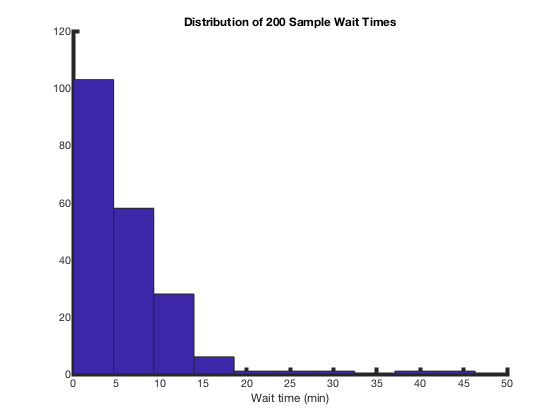

In [45]:
%plot inline
hist(waitTimes_sample)
set(gcf,'Color','w')
set(gca,'Box','off')
set(gca,'LineWidth',3)
set(gca,'FontSize',8)
title('Distribution of 200 Sample Wait Times')
xlabel('Wait time (min)')

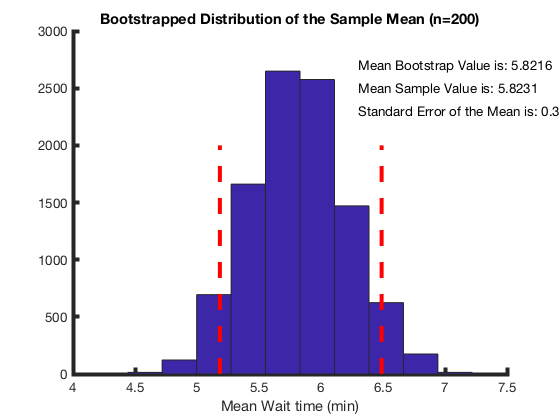

In [31]:
%plot inline
[bootstat,bootsam] = bootstrp(10000,@mean,waitTimes_sample);
hist(bootstat)
set(gcf,'Color','w')
set(gca,'Box','off')
set(gca,'LineWidth',3)
set(gca,'FontSize',10)
title('Bootstrapped Distribution of the Sample Mean (n=200)')
xlabel('Mean Wait time (min)')
meanTxt = {['Mean Bootstrap Value is: ' num2str(mean(bootstat))],['Mean Sample Value is: ' num2str(mean(waitTimes_sample))]};
text([6.3 6.3],[2700, 2500],meanTxt)
bootstat_sort = sort(bootstat);
lowerBound = bootstat_sort(length(bootstat_sort)-.95*length(bootstat_sort));
upperBound = bootstat_sort(.95*length(bootstat_sort));
line(ones(2000,1)*lowerBound,[1:2000]','LineWidth',3,'Color','r','LineStyle','--')
line(ones(2000,1)*upperBound,[1:2000]','LineWidth',3,'Color','r','LineStyle','--')
text([6.3],[2300],['Standard Error of the Mean is: ' num2str(std(bootstat))])

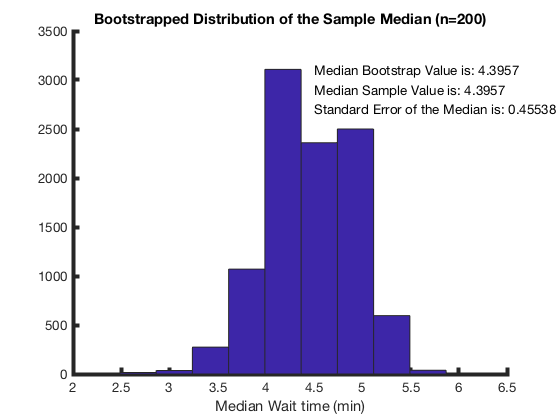

In [94]:
%plot inline
[bootstat,bootsam] = bootstrp(10000,@median,waitTimes_sample);
hist(bootstat)
set(gcf,'Color','w')
set(gca,'Box','off')
set(gca,'LineWidth',3)
set(gca,'FontSize',10)
title('Bootstrapped Distribution of the Sample Median (n=200)')
xlabel('Median Wait time (min)')
meanTxt = {['Median Bootstrap Value is: ' num2str(median(bootstat))],['Median Sample Value is: ' num2str(median(waitTimes_sample))],['Standard Error of the Median is: ' num2str(std(bootstat))]};
text([4.5 4.5 4.5],[3100, 2900,2700],meanTxt)

##  Permutation Testing

In [34]:
waitTimes_pop2 = exprnd(3,100000,1);
waitTimes_sample = waitTimes_pop(randperm(length(waitTimes_pop),20));;
waitTimes_sample2 = waitTimes_pop2(randperm(length(waitTimes_pop2),20));

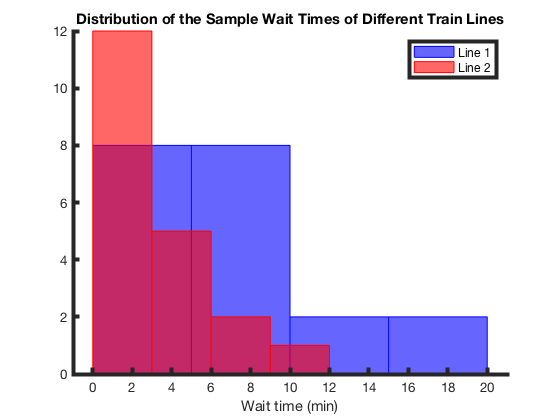

In [35]:
%plot inline
histogram(waitTimes_sample,'FaceColor','b','EdgeColor','b');
hold on
histogram(waitTimes_sample2,'FaceColor','r','EdgeColor','r');
legend('Line 1','Line 2')
set(gcf,'Color','w')
set(gca,'Box','off')
set(gca,'LineWidth',3)
set(gca,'FontSize',10)
title('Distribution of the Sample Wait Times of Different Train Lines')
xlabel('Wait time (min)')

In [36]:
[h,pVal,CI,actualT] = ttest2(waitTimes_sample,waitTimes_sample2);
actualT = actualT.tstat;
acutalMedianDiff = median(waitTimes_sample)-median(waitTimes_sample2);

In [37]:
%plot inline
for p = 1:10000
rng(p)
% combine data into one vector where the first 20 belong to data from line 1 and the second 20 to data from line 2
combData = cat(1,waitTimes_sample,waitTimes_sample2);
combData = combData(randperm(length(combData))); % randomly shuffle data around
[~,~,~,stat] = ttest2(combData(1:length(waitTimes_sample)),combData(length(waitTimes_sample)+1:end));
tPerm(p) = stat.tstat;
medianPerm(p) = median(combData(1:length(waitTimes_sample)))-median(combData(length(waitTimes_sample)+1:end));
end

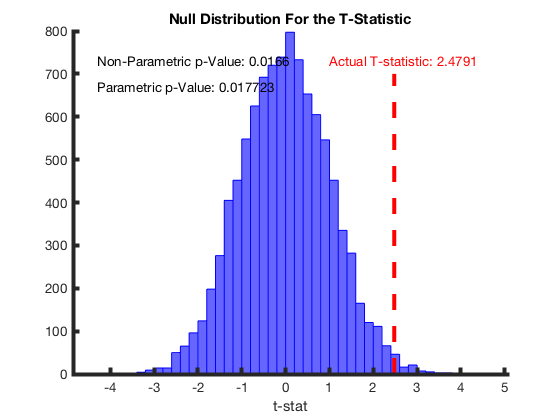

In [38]:
%plot inline
histogram(tPerm,'FaceColor','b','EdgeColor','b');
set(gcf,'Color','w')
set(gca,'Box','off')
set(gca,'LineWidth',3)
set(gca,'FontSize',10)
title('Null Distribution For the T-Statistic')
xlabel('t-stat')
line(ones(700,1)*actualT,[1:700]','LineWidth',3,'Color','r','LineStyle','--')
text(-4.3,730,['Non-Parametric p-Value: ' num2str((sum(actualT<=tPerm)/length(tPerm))*2)])
text(-4.3,670,['Parametric p-Value: ' num2str(pVal)])
text(1,730,['Actual T-statistic: ' num2str(actualT)],'color','r')

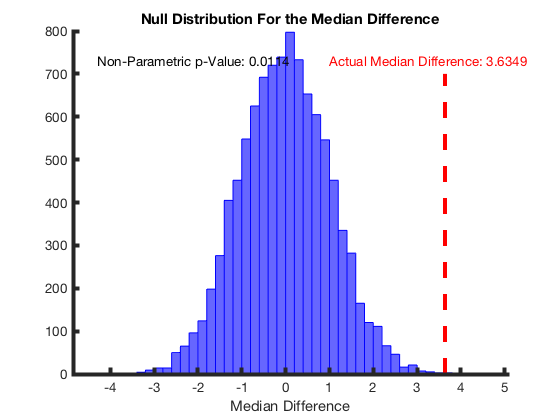

In [39]:
%plot inline
histogram(tPerm,'FaceColor','b','EdgeColor','b');
set(gcf,'Color','w')
set(gca,'Box','off')
set(gca,'LineWidth',3)
set(gca,'FontSize',10)
title('Null Distribution For the Median Difference')
xlabel('Median Difference')
line(ones(700,1)*acutalMedianDiff,[1:700]','LineWidth',3,'Color','r','LineStyle','--')
text(-4.3,730,['Non-Parametric p-Value: ' num2str((sum(acutalMedianDiff<=medianPerm)/length(medianPerm))*2)])
text(1,730,['Actual Median Difference: ' num2str(acutalMedianDiff)],'color','r')

### Sign-Flipping Permutation Test

 Null Hypothesis: The symmetric distribution of the difference in Wait Times has zero mean.
 
Here we introduce an assumption that the null distribution is symmetric around zero. If this is true we can now empirically build this distribution by randomly multiplying each subject's data by 1 or -1.

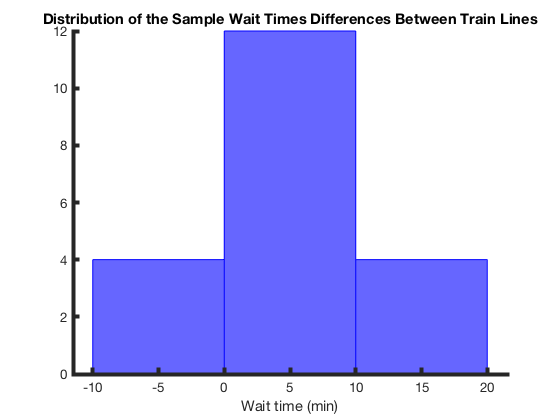

In [40]:
%plot inline
waitTimeDiff = waitTimes_sample-waitTimes_sample2; % this reframes the experiment to be a repeated measures
histogram(waitTimeDiff,'FaceColor','b','EdgeColor','b');
set(gcf,'Color','w')
set(gca,'Box','off')
set(gca,'LineWidth',3)
set(gca,'FontSize',10)
title('Distribution of the Sample Wait Times Differences Between Train Lines')
xlabel('Wait time (min)')

In [41]:
% Create the random sign flips for each subject

numSubj = 20;
rng(1)
signIdx = [-1 1];
parfor p = 1:10000
    for s = 1:numSubj
        permSign(s,p) = signIdx(randperm(2,1));
    end
end
clear p s signIdx
permSign = unique(permSign','rows')'; % make sure that we're only using unique permutations of the data
permSign = permSign(:,randperm(size(permSign,2)));
% all +1 corresponds to the original data, so remove it from the random sign flip permutations
[~,loc] = ismember(ones(1,size(permSign,1)),permSign','rows'); 
if loc ~=0
    permSign(:,loc) = [];
end
permSign = permSign(:,1:2000);


Starting parallel pool (parpool) using the 'local' profile ...
Connected to the parallel pool (number of workers: 2).


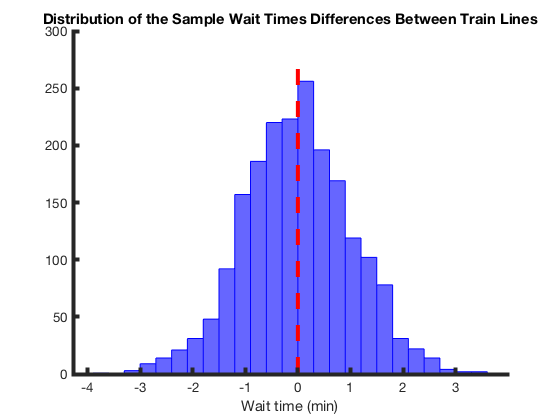

In [42]:
%plot inline
% Center data around 0, so the null hypothesis would be true if there is no real effect
waitTimeDiff = waitTimeDiff-mean(waitTimeDiff);
waitTimePerm = waitTimeDiff.*permSign; % randomly flips the data of each subject
[~,~,~,stat] = ttest(waitTimeDiff);
avgWaitTimeDiff = stat.tstat;
clear tPerm
for p = 1:size(permSign,2)% compute sample-statistic for each permutation
    [~,~,~,stat] = ttest(waitTimePerm(:,p));
    tPerm(p) = stat.tstat;
end
histogram(tPerm,'FaceColor','b','EdgeColor','b');
set(gcf,'Color','w')
set(gca,'Box','off')
set(gca,'LineWidth',3)
set(gca,'FontSize',10)
title('Distribution of the Sample Wait Times Differences Between Train Lines')
xlabel('Wait time (min)')
line(ones(275,1)*avgWaitTimeDiff,[1:275]','LineWidth',3,'Color','r','LineStyle','--')


## Looking at Actual fMRI Data

In [43]:
clear
load('/Users/srd49/Untitled Folder/sample_data/rsa_post.mat')
load('/Users/srd49/Untitled Folder/sample_data/surface_plotting.mat')
originalData = rho_post(:,:,1); % first column is the observed data the rest are permuted data

Rho_post comes from an RSA analysis across 10 subjects. Permutations were performed within each subject by shuffling labels on a model dissimilarity matrix and correlating it with the neural disimilarity matrix. Hence, for even for a given subject we can assesss significance.

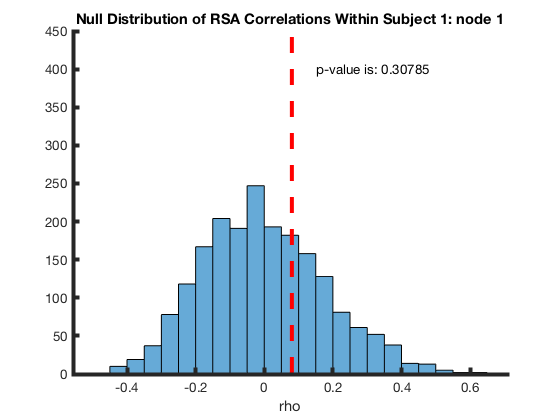

In [20]:
%plot inline
histogram(squeeze((rho_post(1,1,:)))) % subject 1 node 1
set(gcf,'Color','w')
set(gca,'Box','off')
set(gca,'LineWidth',3)
set(gca,'FontSize',10)
title('Null Distribution of RSA Correlations Within Subject 1: node 1')
xlabel('rho')
line(ones(450,1)*rho_post(1,1,1),[1:450]','LineWidth',3,'Color','r','LineStyle','--')
text(.15,400,['p-value is: ' num2str(sum(rho_post(1,1,1)<rho_post(1,1,1:end))/size(rho_post,3))])

We can also look at the group level

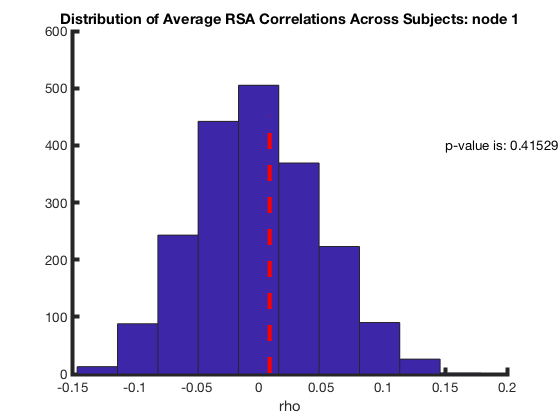

In [19]:
histogram(squeeze(mean(rho_post(:,1,:),1))) % subject 1 node 1
set(gcf,'Color','w')
set(gca,'Box','off')
set(gca,'LineWidth',3)
set(gca,'FontSize',10)
title('Distribution of Average RSA Correlations Across Subjects: node 1')
xlabel('rho')
line(ones(450,1)*mean(rho_post(:,1,1),1),[1:450]','LineWidth',3,'Color','r','LineStyle','--')
text(.15,400,['p-value is: ' num2str(sum(mean(rho_post(:,1,1),1)<mean(rho_post(:,1,1:end),1))/size(rho_post,3))])

Contrast this with the sign-flipping method.

In [44]:
permSign = groupPermMaker(10);
permSign = permute(permSign,[1,3,2]);
permData = bsxfun(@times,originalData,permSign); % bsxfun is a useful way to do element wise operations 
permData = cat(3,originalData,permData); % first matrix (:,:,1) corresponds to the original data

In [29]:
size(permData)


ans =

          10       81924        1024



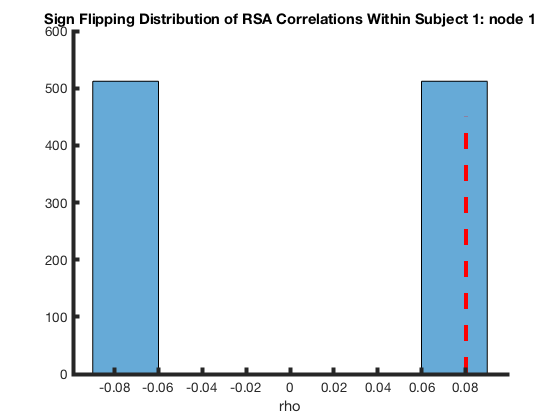

In [45]:
%plot inline
histogram(squeeze((permData(1,1,:)))) % subject 1 node 1
set(gcf,'Color','w')
set(gca,'Box','off')
set(gca,'LineWidth',3)
set(gca,'FontSize',10)
title('Sign Flipping Distribution of RSA Correlations Within Subject 1: node 1')
xlabel('rho')
line(ones(450,1)*permData(1,1,1),[1:450]','LineWidth',3,'Color','r','LineStyle','--')

This reflects that all we did was randomly flip the sign of the data for each subject across permutations. For the sign flipping test, the null hypothesis was specified at the group level. That is, subjects were seen as exchangeable.

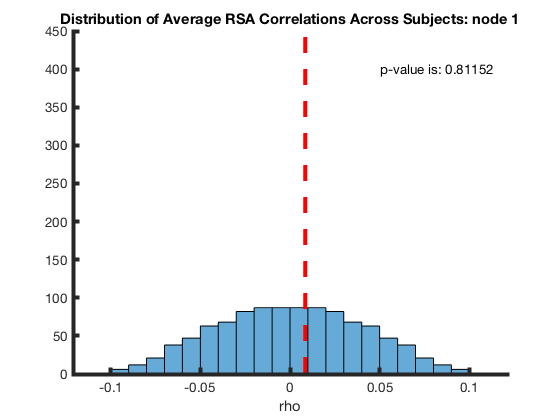

In [46]:
%plot inline
histogram(squeeze(mean(permData(:,1,:),1))) % subject 1 node 1
set(gcf,'Color','w')
set(gca,'Box','off')
set(gca,'LineWidth',3)
set(gca,'FontSize',10)
title('Distribution of Average RSA Correlations Across Subjects: node 1')
xlabel('rho')
line(ones(450,1)*mean(permData(:,1,1),1),[1:450]','LineWidth',3,'Color','r','LineStyle','--')
text(.05,400,['p-value is: ' num2str(sum(mean(permData(:,1,1),1)<mean(rho_post(:,1,1:end),1))/size(permData,3))])

Now, we've created a symmetric null distribution centered on zero.

## Correcting for Multiple Comparisons

No matter the method of permutation testing that we choose, we likely want to perform some kind of group analysis. This means that we must first come up with a sample-statistic to summarize the individual subject data, assess significance of that statistic, and then correct for multiple comparisons.

### Maximum-Statistic Correction

The choice of correction depends on the type of inference we are trying to make. If we want to make an inference about particular voxels then we need a strong control of the family-wise error rate. If we relax this consideration, then weak control of family-wise error rate improves our sensitivity. The maximum-statistic is a method for performing strong control of the family wise error rate.
The steps are as follows:
1. Compute null distribution at each voxel (surface node, electrode, etc.)
2. For each permutation, take the maximum statistic across the entire family of comparisons (e.g. entire brain map)
3. Step 2 should yield a null distribution of maximum statistics of the same size as the number of permutations done
4. The sample-statistic at each point in your original data can be compared to this null distribution of maximum statistics to determine the corrected p-value.

In [59]:
%plot inline
meanPerm = squeeze(mean(rho_post,1));
maxPerbmDist = max(meanPerm);
maxVal = max(mean(originalData,1)); % find maximum sample-statistic over all comparisons in the original data

originalData = rho_post(:,:,1); % first column is the observed data the rest are permuted data
maxVal = max(mean(originalData,1)) % find maximum sample-statistic over all comparisons in the original data
hist(maxPermDist) % subject 1 node 1
set(gcf,'Color','w')
set(gca,'Box','off')
set(gca,'LineWidth',3)
set(gca,'FontSize',10)
title('Distribution of Maximum-Statistics Across Subjects')
xlabel('rho')
line(ones(400,1)*maxVal,[1:400]','LineWidth',3,'Color','r','LineStyle','--')
text(.11,400,['p-value is: ' num2str(sum(maxVal<=maxPermDist)/length(maxPermDist))])
text(maxVal-.1,400,['Maximum Observed Value: ' num2str(maxVal)])


maxVal =

    0.2863



Error using eval
Unrecognized function or variable 'maxPermDist'.



Now we may not care about correcting at any speicifc voxel since we know that data in fMRI is spatially correlated. So, instead we may want to correct at a slightly weaker level using cluster-based statistics such as cluster mass. This is essentially the same as the maximum-statistic procedure, but now we build a null distribution of maximum cluster masses across permutations. The steps are as follows:
1. Compute permutations (e.g. 1000 permutations) at each voxel (electrode, time point, etc.) 
2. Compute the p-value at each voxel for the actual observed data
3. Threshold image at a specified ⍺ (e.g. .001)
4. Identify spatially contiguous clusters
5. For each permutation repeat steps 2-4, but only keep the largest cluster. Thereby creating a null distribution of cluster sizes
6. Find how many clusters in your actual data exceed 95% of clusters in the null distribution

In [4]:
%%file clusterCorrection.m
function results = clusterCorrection(surf_ds,vo,fo,v_inf)
% This function is a sample script for performing cluster mass correction. Can be adapted to fit different contexts. Surf_Ds.samples contains permutations data (:,:,1) contains the original observed data matrix

% Load surface neighborhood adjacency structure
load('/Users/srd49/Untitled Folder/sample_data/cluster_nbrhood.mat');
nbrhood_mat = cosmo_convert_neighborhood(cluster_nbrhood,'matrix');

% Load subcortical masks to remove meaningless vertices
subcorticalMsk_dir = '/Users/srd49/Untitled Folder/sample_data';
fid = fopen(fullfile(subcorticalMsk_dir,'lh_subcortical_64.1D.roi'));
lhMask = textscan(fid,'%f%f');
fclose(fid);
fid = fopen(fullfile(subcorticalMsk_dir,'rh_subcortical_64.1D.roi'));
rhMask = textscan(fid,'%f%f');
fclose(fid);
subcortMsk = [lhMask{1}+1;(rhMask{1}+1+size(v_inf,1)/2)];


%Get p-values Data
%parfor p = 1:size(surf_ds.samples,2) % iterate through each permutation
%    % for a given permutation calculate the p-value at each surface node. This p-value represents the percentage of values in the null distribution that are greater than the observed statistic
%    pVal(:,p) = sum(surf_ds.samples(:,p)<=surf_ds.samples(:,1:end),2)/(size(surf_ds.samples,2));
%end
%% remove effect of useless vertices (e.g. subcortical vertices)
%pVal(subcortMsk,:) = 1;
%pVal(isnan(surf_ds.samples)) = 1;
load('/Users/srd49/Untitled Folder/sample_data/p_val.mat'); %pre-computed to save time


% Identify clusters in observed data and build null distribution of maximum cluster sizes
for p = 1:size(surf_ds.samples,2)
    tmp = cosmo_clusterize(double(pVal(:,p)<=.001)',nbrhood_mat); % calls on cosmo_clusterize in the CosmoMVPA toolbox
    if ~isempty(tmp) % if there are clusters
        for c = 1:length(tmp)
            tmp2(c) = sum(surf_ds.samples(tmp{c},p)); % get the mass of each cluster (sum of the statistics within the cluster)
        end
        if p==1 % if it's our actual observed data then keep all the clusters and their corresponding cluster masses
            clusters  =tmp;
            clusMass = tmp2;
        else % if it's a permuted distribution, the identify the mass of the larges cluster
            clusPerm{p-1} = tmp;
            [clusMassPerm(p-1),idx] = max(tmp2); % keeps track of mass of the largest cluster
        end
    else
        if p==1
            clusters  =[];
            clusMass = 0;
        else
            clusPerm{p-1} = [];
            clusMassPerm(p-1) = 0;
        end
        
    end
    clear tmp2 tmp
end

% Identify the significance of each of our observed clusters by comparing it to the null distribution of largest clusters
for c = 1:length(clusMass)
    p_clus(c) = sum(clusMassPerm>clusMass(c))/length(clusMassPerm);
end

sigIdx = find(p_clus<=.05);
sig_p = p_clus(sigIdx);
sigClus = clusters(sigIdx);
results.sigIdx = sigIdx;
results.sig_p = sig_p;
results.sigClus = sigClus;
results.p_val = pVal;

Created file '/Users/srd49/Untitled Folder/clusterCorrection.m'.


In [60]:
% To save time I've pre-computed this for rho_post. The sample-statistic is the t-statistic rather than sample mean
load('/Users/srd49/Untitled Folder/sample_data/cluster_nbrhood.mat');
nbrhood_mat = cosmo_convert_neighborhood(cluster_nbrhood,'matrix');
load('/Users/srd49/Untitled Folder/sample_data/p_val.mat'); %pre-computed to save time
load('/Users/srd49/Untitled Folder/sample_data/surf_ds.mat')

# % adapted from clusterCorrection
for p = 1:size(surf_ds.samples,2)
    tmp = cosmo_clusterize(double(pVal(:,p)<=.001)',nbrhood_mat); % calls on cosmo_clusterize in the CosmoMVPA toolbox
    if ~isempty(tmp) % if there are clusters
        for c = 1:length(tmp)
            tmp2(c) = sum(surf_ds.samples(tmp{c},p)); % get the mass of each cluster (sum of the statistics within the cluster)
        end
        if p==1 % if it's our actual observed data then keep all the clusters and their corresponding cluster masses
            clusters  =tmp;
            clusMass = tmp2;
        else % if it's a permuted distribution, the identify the mass of the larges cluster
            clusPerm{p-1} = tmp;
            [clusMassPerm(p-1),idx] = max(tmp2); % keeps track of mass of the largest cluster
        end
    else
        if p==1
            clusters  =[];
            clusMass = 0;
        else
            clusPerm{p-1} = [];
            clusMassPerm(p-1) = 0;
        end
        
    end
    clear tmp2 tmp
end

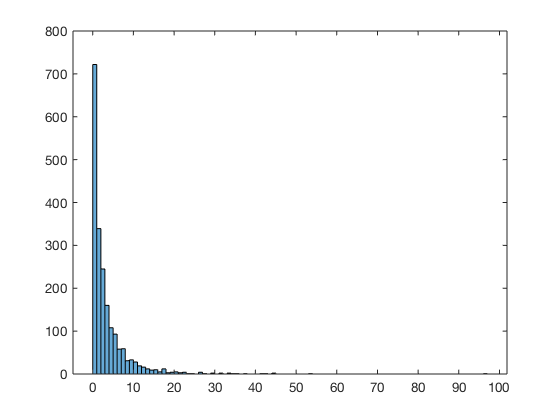

In [63]:
histogram(clusMassPerm)

In [64]:
% Identify the significance of each of our observed clusters by comparing it to the null distribution of largest clusters
for c = 1:length(clusMass)
    p_clus(c) = sum(clusMassPerm>clusMass(c))/length(clusMassPerm);
end
sigIdx = find(p_clus<=.05);
sig_p = p_clus(sigIdx);
sigClus = clusters(sigIdx);

In [65]:
sigIdx


sigIdx =

    77



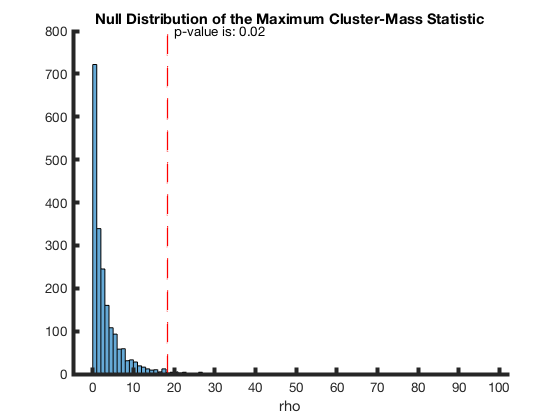

In [66]:
%plot inline
histogram(clusMassPerm) % subject 1 node 1
set(gcf,'Color','w')
set(gca,'Box','off')
set(gca,'LineWidth',3)
set(gca,'FontSize',10)
title('Null Distribution of the Maximum Cluster-Mass Statistic')
xlabel('rho')
line(ones(800,1)*clusMass(sigIdx),[1:800]','LineWidth',1,'Color','r','LineStyle','--')
text(20,800,['p-value is: ' num2str(sum(clusMass(sigIdx)<=clusMassPerm)/length(clusMassPerm))])

## Useful References
1. Nonparametric permutation tests for functional neuroimaging: a primer with examples.
2. Nonparametric statistical testing of EEG- and MEG-data.
3. Cluster-based computational methods for mass univariate analyses of event-related brain potentials/fields: A simulation study
4. Global, voxel, and cluster tests, by theory and permutation, for a difference between two groups of structural MR images of the brain
5. Threshold-free cluster enhancement: addressing problems of smoothing, threshold dependence and localisation in cluster inference.
6. Controlling the familywise error rate in functional neuroimaging: a comparative review
7. https://github.com/DDTBOX/DDTBOX/wiki/Correcting-For-Multiple-Comparisons
